# Store range effect in purchase

In this notebook we explore a data set of customers and its purchases in different stores

In [1]:
# https://bigml.com/user/czuriaga/gallery/dataset/5559c2c6200d5a6570000084#info
# http://www.michelecoscia.com/?page_id=379
# Lift in data mining
# https://en.wikipedia.org/wiki/Lift_(data_mining)

# Data Science central ... clustering with R
# http://www.datasciencecentral.com/profiles/blogs/find-marketing-clusters-in-20-minutes-in-r

Import needed libraries

In [103]:
import pandas as pd
import os
import numpy as np

import matplotlib 
#import matplotlib as mpl
#mpl.rcParams['font.size'] = 9.0

import matplotlib.pyplot as plt

%matplotlib inline

#from sklearn.cross_validation import train_test_split

Read data, drop NA's and get number of records (customers)

In [3]:
data = pd.read_csv('data.csv')
data = data.dropna()
num_customers = data.shape[0]

In [4]:
data.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090,473,7551.701,14.221659,3.150493,2,...,10.441143,14.862848,0.000000,0,0.000000,6.393403,2.600485,0.000000,0,0.000000
1,2,909.76764,254.94832,2295.4840,4508,486,7820.219,11.235947,2.191422,4,...,3.761943,4.848720,2.546600,0,16.479185,2.851152,2.009863,2.059450,0,2.103394
2,3,1498.94700,754.29560,2831.7727,814,234,1788.613,5.453088,2.258994,4,...,3.757062,5.605183,1.923385,0,5.924268,3.426687,2.478529,1.923385,0,1.947067
3,4,561.65900,362.79178,2210.3820,648,208,1679.520,5.976940,2.614292,4,...,4.997400,2.688400,5.029184,0,7.156351,4.997400,2.688400,2.083168,0,2.754427
4,5,605.36280,275.46753,1375.1184,13,10,17.922,1.792200,1.692000,2,...,0.000000,0.967667,2.145571,0,0.000000,0.000000,0.633667,2.145571,0,0.000000


In [5]:
data.columns.values

array(['customer_id', 'avg_distance_to_shops', 'min_distance_to_shops',
       'max_distance_to_shops', 'products_purchased',
       'unique_products_purchased', 'amount_purchased', 'avg_purchase',
       'avg_price', 'shops_used', 'distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5',
       'products_purchased_shop_1', 'products_purchased_shop_2',
       'products_purchased_shop_3', 'products_purchased_shop_4',
       'products_purchased_shop_5', 'unique_products_purchased_shop_1',
       'unique_products_purchased_shop_2',
       'unique_products_purchased_shop_3',
       'unique_products_purchased_shop_4',
       'unique_products_purchased_shop_5', 'amount_purchased_shop_1',
       'amount_purchased_shop_2', 'amount_purchased_shop_3',
       'amount_purchased_shop_4', 'amount_purchased_shop_5',
       'avg_purchase_shop_1', 'avg_purchase_shop_2', 'avg_purchase_shop_3',
       'avg_purchase_shop_4', 'avg_purchase_shop_5', 'avg_price_sho

Let's get the distribution of average purchases in store according to shops (in this case five stores)

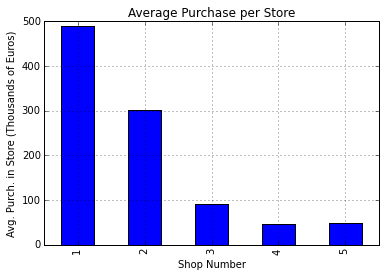

In [48]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_purchase_shop_' + str(k)
    aux_ = data[text_].sum()/1000.
    list_purchase.append(aux_)
dfAux = pd.DataFrame()
dfAux['Store Number'] = [1,2,3,4,5]
dfAux['Avg. Purchase in Shop'] = list_purchase

dfAux.plot(x='Store Number',y='Avg. Purchase in Shop',kind='bar',
           title='Average Purchase per Store',legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Avg. Purch. in Store (Thousands of Euros)')
plt.show()

The previous graph shows that the most profitable store is store number 1. In what follows we will try to figure out why but for the time being let's keep doing exploratory data analysis.

We now show distribution of customers according to the number of shops they use when they purchase

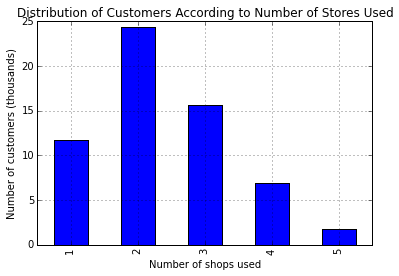

In [50]:
list_purchase = []
for k in range(1,6):
    aux_ = sum(data['shops_used']== k)
    perc_ = float(aux_/1000.)
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Number of Shops Used'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase

dfAux.plot(x='Number of Shops Used',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Number of Stores Used',
           legend=False,grid=True)
plt.xlabel('Number of shops used ')
plt.ylabel('Number of customers (thousands)')
plt.show()

The previous bar plot reveals that the majority of clients utilize exactly two stores, follows by customers that utilize exactly two and then the ones that use exactly one. The minority utilize exactly four and five stores so we will focus on the ones that use exactly one, two and three stores.

We now let's show the distribution of customers according to the shop number

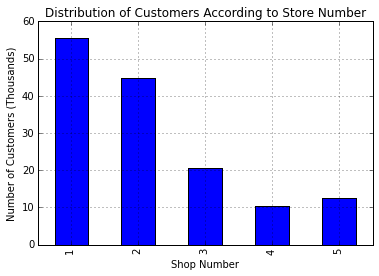

In [53]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_price_shop_' + str(k)
    aux_ = sum(data[text_] <> 0)
    perc_ = float(sum(data[text_] <> 0)/1000.)
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase

dfAux.plot(x='Shop Number',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Store Number',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of Customers (Thousands)')
plt.show()



In what follows we will add to our data frame two columns. One of them will indicate the number of store that is closest to customer while the other will indicate what shop is the farthest. For this goal we first remind ourselves of what the relevant fields are.

In [55]:
data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730


Let's now transform the previous data frame to a numpy array for further calculations

In [58]:
dist_ = data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].values

print type(dist_)
print dist_

<type 'numpy.ndarray'>
[[ 4082.5222    985.8762   2372.097    4929.8047   3284.3867 ]
 [ 1115.3433   2295.484     670.9008   2048.0605    254.94832]
 [ 1418.8348   2831.7727   1286.819    1545.1963    754.2956 ]
 ..., 
 [  938.86285  2375.3333    785.6533   2044.8994    247.7872 ]
 [ 1727.252    1846.5889   1124.2445   3185.135    1456.6217 ]
 [ 1025.5867   3444.8223   1823.8531    869.9029    959.00525]]


We finally add the two aforementioned columns...

In [59]:
# Empty lists
closest = []
farthest = []
# For every customer (columns in previous matrix )...
for k in range(num_customers):
    # ... find the index that corresponds to the maximum and minimum 
    # distances and add one to it (remember indexing in Python begins
    # at zero while the indexing at customer number begins at one) ...
    Min = 1 + dist_[k,:].argmin()
    Max = 1 + dist_[k,:].argmax()
    #  ... and add each value to corresponding list
    closest.append(Min)
    farthest.append(Max)
# Finally add columns to the data frame
data['closest_shop'] = closest
data['farthest_shop'] = farthest

We check the previous actions took place

In [60]:
data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5','closest_shop',
      'farthest_shop']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5,closest_shop,farthest_shop
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670,2,4
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832,5,2
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560,5,2
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178,5,2
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730,3,4


We now see distribution of customers according to closeness to store

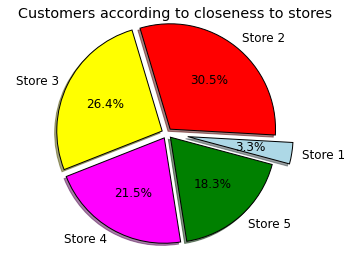

In [141]:
# Reference for pie chart: https://www.getdatajoy.com/examples/python-plots/pie-chart
list_purchase = []
labels_ = ["Store 1","Store 2","Store 3","Store 4","Store 5"]
colors = ['lightblue','red','yellow','magenta','green']
explode = (0.2,0.05,0.05,0.05,0.05)
for k in range(1,6):
    aux_ = sum(data['closest_shop'] == k)
    perc_ = float(aux_)*100./float(num_customers)
    list_purchase.append(perc_)

    
matplotlib.rcParams.update({'font.size': 12})
plt.pie(list_purchase,explode=explode,colors=colors,labels=labels_,
        autopct='%1.1f%%',shadow=True,startangle=-15)

plt.axis('equal')

plt.title('Customers according to closeness to stores')

plt.show()


The previous bar plot reveals that the majority of customers live closest to store 2 while the minorty live closest to store 1. This is something that deserves more exploration since the store that generated the highest revenue, on average, is store 1. Keep in mind that that bar plot showing the average purchase per store does not exclude customers that buy **exclusively** in that store. That is, people who by in store 1 may also buy in other stores. 
Let's then analyse this further.

We now analyse, of the people who purchase in a given store, what fraction of them live closest to such given store.

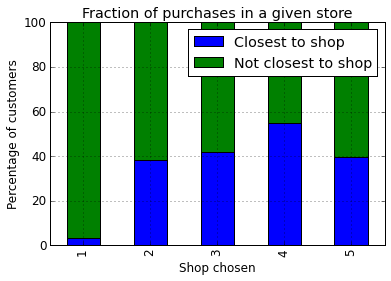

In [158]:
# Fraction of people who purchse in a given store that live closest to it

# Set empty lists and empty data frame
listA = []; listB = []
df_stack = pd.DataFrame()
# Auxiliary test to extract desired values
text_ = 'amount_purchased_shop_'
# For each of the five stores...
for k in range(1,6):
    # ... the total number of customers who purchased at 
    # the store in turn ...
    a = sum((data[text_ + str(k)] != 0.)) 
    # ... and from that total number, get the ones that ALSO live 
    # closest to the store in turn.
    b = sum((data[text_ + str(k)] != 0.) & (data.closest_shop == k))
    
    # From the customers who purchase at a given store we determine the 
    # fraction of them that live the closest to the store in question
    fract_ = float(b)/float(a)
    # Store the complement (the ones who DO NOT live closest to store)...
    listA.append((1. - fract_)*100.)
    # ... and the fraction itself
    listB.append(fract_*100.)

# Create dataframe to make the stacked bar plots
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# And plot
matplotlib.rcParams.update({'font.size': 12})
df_stack.plot(kind='bar',
           title='Fraction of purchases in a given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()



In [153]:
df_stack

,Closest to shop,Not closest to shop
1,3.409418,96.590582
2,38.183685,61.816315
3,42.013364,57.986636
4,54.961538,45.038462
5,39.644208,60.355792


Of particular interest is store number 1. Only **3.5%** of customers who purchased in that store live the closest to it. A less dramatic but still interesting situation can be seen in stores 2, 3 and 5; about **40 %** of each of these stores' customers live the closest to each of them. 

Let's do a similar analysis but this time we will focus only on customers that purchased EXCLUSIVELY in ONE store

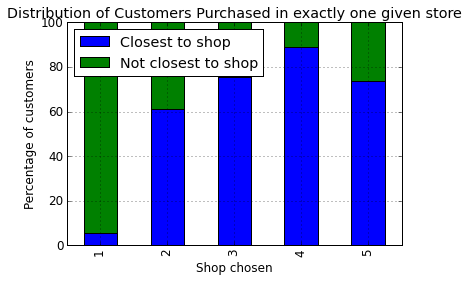

In [174]:
# Empty lists and dataframe
listA = [];listB = []
df_stack = pd.DataFrame()

# Auxiliary text to filter data of interest
text_ = 'amount_purchased_shop_'

# For each store...
for k in range(1,6):
    
    # Get number of customers that purchased in the store in turn and ONLY in that store...
    a =  sum((data[text_ + str(k)] != 0.) & (data.shops_used == 1))
    # ... and extract from them those who are closest to the store in turn
    b = sum((data[text_ + str(k)] != 0.) & (data.shops_used == 1) &
            (data.closest_shop == k))
    
    # From the previous to numbers get the fraction desired...
    fract_ = float(b)/float(a)

    # ... and store it, as well as its complement, in the corresponding
    # lists created before
    listA.append((1. - fract_)*100.)
    listB.append(fract_*100.)
    

# Create the corrsponding dataframe ...
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# ... and plot
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in exactly one given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

    


In [175]:
df_stack

,Closest to shop,Not closest to shop
1,5.571554,94.428446
2,60.971660,39.028340
3,75.278396,24.721604
4,89.121339,10.878661
5,73.619632,26.380368


This reveals that only **5.5% ** of customers who purchased in store 1 and store 1 only live the closest to it.

Let's do a similar analysis and determine, of the customers that purchased in ONLY one store and live the closest to a given store, the fraction that purchased in that particular store

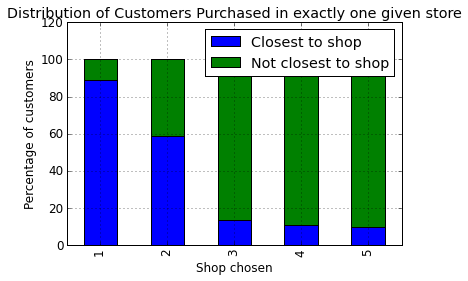

In [176]:
# PERCENTAGE OF ALL PEOPLE WHO PURCHASE AT ONLY ONE GIVEN SHOP AND ARE CLOSEST TO SUCH STORE

# Empty lists and dataframe
listA = [];listB = []
df_stack = pd.DataFrame()

# Auxiliary text to filter data of interest
text_ = 'amount_purchased_shop_'

# For each store...
for k in range(1,6):
    
    # Get number of customers that purchased ONLY in one store and live the closest
    # to the store in question
    a =  sum((data.closest_shop == k) & (data.shops_used == 1))
    # ... and extract from them those who purchased in that store
    b = sum((data[text_ + str(k)] != 0.) & (data.shops_used == 1) &
            (data.closest_shop == k))
    
    # From the previous to numbers get the fraction desired...
    fract_ = float(b)/float(a)

    # ... and store it, as well as its complement, in the corresponding
    # lists created before
    listA.append((1. - fract_)*100.)
    listB.append(fract_*100.)
    

# Create the corrsponding dataframe ...
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# ... and plot
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in exactly one given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

    


In [177]:
df_stack

,Closest to shop,Not closest to shop
1,88.822355,11.177645
2,58.644860,41.355140
3,13.784666,86.215334
4,11.219384,88.780616
5,10.033445,89.966555


Store 1 keeps getting our interst as **89%** of customers who purchased in only in one store and live the closest to that store, decided to purchase in that store. This percetange goes down to **60.0%** for store 2. A very dramatic situation is observed for stores 3, 4 and 5 as only **10%** of customers who live the closest to each corresponding store and purchased exclusively in one store, decided to purchase somewhere else.

In [229]:
# Data frame for users who purchased in only ONE shop

df_close = pd.DataFrame()
text_ = 'amount_purchased_shop_'
one_store = []
closest_to_X = []
cumul_num = 0
for k in range(1,6):
    dfX = data[ (data[text_+str(k)] != 0.) & (data.shops_used == 1) ]
    numX = dfX.shape[0]
    cumul_num += numX
    one_store.append(numX)
    
    closest_to_X.append( [sum(dfX.closest_shop == n) for n in range(1,6)] )
    
df_close = pd.DataFrame()
df_close['Total customers'] = one_store
text_ = 'Closest to '
for m in range(5):
    df_close[text_+str(m+1)] = [closest_to_X[k][m] for k in range(5)]
df_close.index = range(1,6)  



In [232]:
print cumul_num 
print sum(data.shops_used == 1)

11710
11710


In [233]:
df_close

,Total customers,Closest to 1,Closest to 2,Closest to 3,Closest to 4,Closest to 5
1,7987,445,1019,1557,3112,1854
2,2470,18,1506,519,196,231
3,449,10,18,338,36,47
4,478,4,9,19,426,20
5,326,24,16,19,27,240


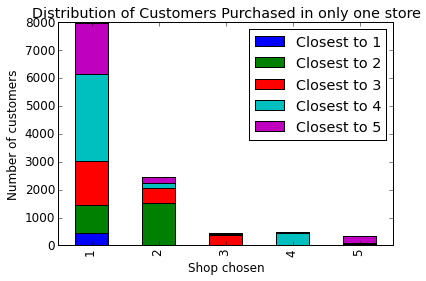

In [231]:
df_stack = df_close[['Closest to 1','Closest to 2','Closest to 3',
                     'Closest to 4','Closest to 5']]
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in only one store',stacked=True)
plt.xlabel('Shop chosen')
plt.ylabel('Number of customers')
plt.show()

In [29]:
# Data frame for users who purchased in only TWO shops
df_1_and_2 = data[(data.amount_purchased_shop_1 != 0.) &
                        (data.amount_purchased_shop_2 != 0.) & (data.shops_used == 2)]

pair_12 = df_1_and_2.shape[0]


df_1_and_3 = data[(data.amount_purchased_shop_1 != 0.) &
                        (data.amount_purchased_shop_3 != 0.) & (data.shops_used == 2)]

pair_13 = df_1_and_3.shape[0]

df_1_and_4 = data[(data.amount_purchased_shop_1 != 0.) &
                        (data.amount_purchased_shop_4 != 0.) & (data.shops_used == 2)]

pair_14 = df_1_and_4.shape[0]

df_1_and_5 = data[(data.amount_purchased_shop_1 != 0.) &
                        (data.amount_purchased_shop_5 != 0.) & (data.shops_used == 2)]

pair_15 = df_1_and_5.shape[0]

df_2_and_3 = data[(data.amount_purchased_shop_2 != 0.) &
                        (data.amount_purchased_shop_3 != 0.) & (data.shops_used == 2)]

pair_23 = df_2_and_3.shape[0]

df_2_and_4 = data[(data.amount_purchased_shop_2 != 0.) &
                        (data.amount_purchased_shop_4 != 0.) & (data.shops_used == 2)]

pair_24 = df_2_and_4.shape[0]

df_2_and_5 = data[(data.amount_purchased_shop_2 != 0.) &
                        (data.amount_purchased_shop_5 != 0.) & (data.shops_used == 2)]

pair_25 = df_2_and_5.shape[0]

df_3_and_4 = data[(data.amount_purchased_shop_3 != 0.) &
                        (data.amount_purchased_shop_4 != 0.) & (data.shops_used == 2)]

pair_34 = df_3_and_4.shape[0]

df_3_and_5 = data[(data.amount_purchased_shop_3 != 0.) &
                        (data.amount_purchased_shop_5 != 0.) & (data.shops_used == 2)]

pair_35 = df_3_and_5.shape[0]

df_4_and_5 = data[(data.amount_purchased_shop_4 != 0.) &
                        (data.amount_purchased_shop_5 != 0.) & (data.shops_used == 2)]

pair_45 = df_4_and_5.shape[0]


In [30]:
print pair_12, num_1, num_2
print pair_13, num_1, num_3
print pair_14, num_1, num_4
print pair_15, num_1, num_5
print "==="*8
print pair_23, num_2, num_3
print pair_24, num_2, num_4
print pair_25, num_2, num_5
print "==="*8
print pair_34, num_3, num_4
print pair_35, num_3, num_5
print "==="*8
print pair_45, num_4, num_5

18819 7987 2470
1639 7987 449
1806 7987 478
1198 7987 326
414 2470 449
178 2470 478
140 2470 326
34 449 478
101 449 326
33 478 326


In [31]:
print sum(df_1_and_2.closest_shop == 1)
print sum(df_1_and_2.closest_shop == 2)
print sum(df_1_and_2.closest_shop == 3)

343
9785
4215


In [32]:
data[['amount_purchased','amount_purchased_shop_1','amount_purchased_shop_2',
     'amount_purchased_shop_3','amount_purchased_shop_4','amount_purchased_shop_5']].head()

,amount_purchased,amount_purchased_shop_1,amount_purchased_shop_2,amount_purchased_shop_3,amount_purchased_shop_4,amount_purchased_shop_5
0,7551.701,803.968,6747.733,0.000,0,0.000
1,7820.219,395.004,848.526,50.932,0,6525.757
2,1788.613,120.226,582.939,25.004,0,1060.444
3,1679.520,99.948,13.442,628.648,0,937.482
4,17.922,0.000,2.903,15.019,0,0.000


In [33]:
data[['unique_products_purchased','unique_products_purchased_shop_1',
      'unique_products_purchased_shop_2','unique_products_purchased_shop_3',
      'unique_products_purchased_shop_4','unique_products_purchased_shop_5']].head()

,unique_products_purchased,unique_products_purchased_shop_1,unique_products_purchased_shop_2,unique_products_purchased_shop_3,unique_products_purchased_shop_4,unique_products_purchased_shop_5
0,473,77,454,0,0,0
1,486,105,175,20,0,396
2,234,32,104,13,0,179
3,208,20,5,125,0,131
4,10,0,3,7,0,0


In [34]:
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_1 != 0.)]
          ['unique_products_purchased_shop_1'].values)
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_2 != 0.)]
          ['unique_products_purchased_shop_2'].values)
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_3 != 0.)]
          ['unique_products_purchased_shop_3'].values)
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_4 != 0.)]
          ['unique_products_purchased_shop_4'].values)
print max(data[(data.shops_used == 1) & (data.amount_purchased_shop_5 != 0.)]
          ['unique_products_purchased_shop_5'].values)

1229
899
739
725
572


In [35]:
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_1 != 0.)]
          ['unique_products_purchased_shop_1'].values)
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_2 != 0.)]
          ['unique_products_purchased_shop_2'].values)
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_3 != 0.)]
          ['unique_products_purchased_shop_3'].values)
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_4 != 0.)]
          ['unique_products_purchased_shop_4'].values)
print max(data[(data.shops_used == 2) & (data.amount_purchased_shop_5 != 0.)]
          ['unique_products_purchased_shop_5'].values)

1459
1161
715
723
750


In [36]:
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_1 != 0.)]
          ['unique_products_purchased_shop_1'].values)
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_2 != 0.)]
          ['unique_products_purchased_shop_2'].values)
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_3 != 0.)]
          ['unique_products_purchased_shop_3'].values)
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_4 != 0.)]
          ['unique_products_purchased_shop_4'].values)
print max(data[(data.shops_used == 3) & (data.amount_purchased_shop_5 != 0.)]
          ['unique_products_purchased_shop_5'].values)

1245
1053
836
785
801


In [42]:
data[(data.shops_used == 1)][['unique_products_purchased_shop_1',
                              'unique_products_purchased_shop_2',
                              'unique_products_purchased_shop_3',
                              'unique_products_purchased_shop_4',
                              'unique_products_purchased_shop_5']].head()

,unique_products_purchased_shop_1,unique_products_purchased_shop_2,unique_products_purchased_shop_3,unique_products_purchased_shop_4,unique_products_purchased_shop_5
6,19,0,0,0,0
13,55,0,0,0,0
16,14,0,0,0,0
23,48,0,0,0,0
24,0,54,0,0,0


In [43]:
print data[(data.shops_used == 1) & (data.amount_purchased_shop_1 !=0)]['unique_products_purchased'].max()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_2 !=0)]['unique_products_purchased'].max()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_3 !=0)]['unique_products_purchased'].max()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_4 !=0)]['unique_products_purchased'].max()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_5 !=0)]['unique_products_purchased'].max()

1229.0
899.0
739.0
725.0
572.0


In [44]:
print data[(data.shops_used == 1) & (data.amount_purchased_shop_1 !=0)]['unique_products_purchased'].min()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_2 !=0)]['unique_products_purchased'].min()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_3 !=0)]['unique_products_purchased'].min()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_4 !=0)]['unique_products_purchased'].min()
print data[(data.shops_used == 1) & (data.amount_purchased_shop_5 !=0)]['unique_products_purchased'].min()

1.0
1.0
1.0
1.0
1.0


In [45]:
print sum((data.shops_used == 1) & (data.amount_purchased_shop_1 !=0))
print sum((data.shops_used == 1) & (data.amount_purchased_shop_2 !=0))
print sum((data.shops_used == 1) & (data.amount_purchased_shop_3 !=0))
print sum((data.shops_used == 1) & (data.amount_purchased_shop_4 !=0))
print sum((data.shops_used == 1) & (data.amount_purchased_shop_5 !=0))

7987
2470
449
478
326


In [46]:
quartiles = np.percentile(data.amount_purchased.values,np.arange(0,100,25))
quartiles

array([  2.12000000e-01,   6.53107000e+02,   2.35513800e+03,
         6.05463100e+03])

In [47]:
text_ = 'amount_purchased_shop_1'
print sum((data[text_] != 0.))

55552


# Appendix

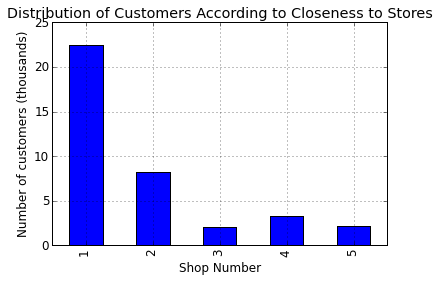

In [155]:
# PERCENTAGE OF CUSTOMER WHO PURCHASE AT A GIVEN STORE ARE IN FACT CLOSEST TO THAT STORE
# FOR CUSTOMERS WHO PURCHASE IN ONLY ONE STORE

list_purchase = []
rest = []
for k in range(1,6):
    df_aux = data[data['closest_shop'] == k][['amount_purchased_shop_'+str(k),'shops_used']]
    #aux_ = sum(data['closest_shop'] == k)
    aux_ = df_aux.shape[0]
    #aux2 = sum((data['closest_shop'] == k) & (data['amount_purchased_shop_'+str(k)] !=0 ) &
# (data['shops_used'] == 1)) 
    aux2 = sum((df_aux['amount_purchased_shop_'+str(k)] !=0 ) & (df_aux['shops_used'] == 1)) 
    #perc_ = aux_/float(num_customers)*100
    perc_ = float(aux2)*100/float(aux_)
    #print k , perc_
    list_purchase.append(perc_)
    rest.append(100. - perc_)
dfAux = pd.DataFrame()
#dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Customers Closest to Store'] = list_purchase
#dfAux['Customers Closest to another store'] = rest
dfAux.index = range(1,6)


#dfAux.plot(x='Shop Number',y='Customers Closest to Store',kind='bar',
#           title='Distribution of Customers According to Closeness to Stores',
#           legend=False,grid=True)
dfAux.plot(kind='bar',title='Distribution of Customers According to Closeness to Stores',
           legend=False,grid=True) #,stacked=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of customers (thousands)')
plt.show()


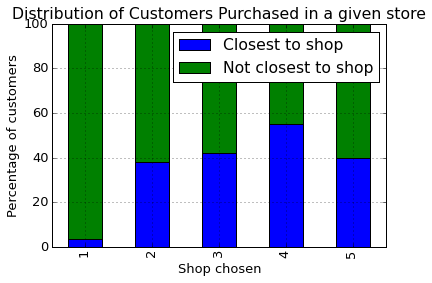

In [136]:
# PERCENTAGE OF ALL PEOPLE WHO PURCHASE AT A GIVEN SHOP AND ARE CLOSEST TO SUCH STORE

listA = []
listB = []
df_stack = pd.DataFrame()
text_ = 'amount_purchased_shop_'
for k in range(1,6):
    
    a = sum((data[text_ + str(k)] != 0.)) 
   
    b = sum((data.closest_shop == k) & (data[text_ + str(k)] != 0.))
    
    listA.append((1. - float(b)/float(a))*100.)
    listB.append(float(b)/float(a)*100.)

    #print b, a, 100.*float(b)/float(a)
    
    #print "====="*8


df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in a given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()



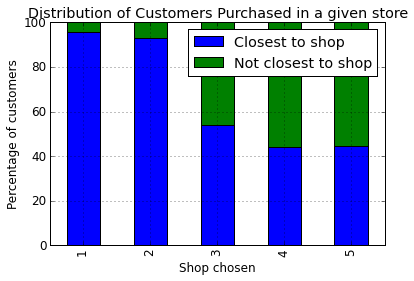

In [154]:
# PERCENTAGE OF ALL PEOPLE WHO PURCHASE AT A GIVEN SHOP AND ARE CLOSEST TO SUCH STORE

# Set empty lists and empty data frame
listA = []; listB = []
df_stack = pd.DataFrame()
# Auxiliary test to extract desired values
text_ = 'amount_purchased_shop_'
# For each of the five stores...
for k in range(1,6):
    # ... the total number of customers who purchased at 
    # the store in turn ...
    a = sum((data.closest_shop == k)) 
    # ... and from that total number, get the ones that ALSO live 
    # closest to the store in turn.
    b = sum((data[text_ + str(k)] != 0.) & (data.closest_shop == k))
    # From the customers who purchase at a given store we determine the 
    # fraction of them that live the closest to the store in question
    fract_ = float(b)/float(a)
    # Store the complement (the ones who DO NOT live closest to store)...
    listA.append((1. - fract_)*100.)
    # ... and the fraction itself
    listB.append(fract_*100.)

# Create dataframe to make the stacked bar plots
df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

# And plot
matplotlib.rcParams.update({'font.size': 12})
df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in a given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()



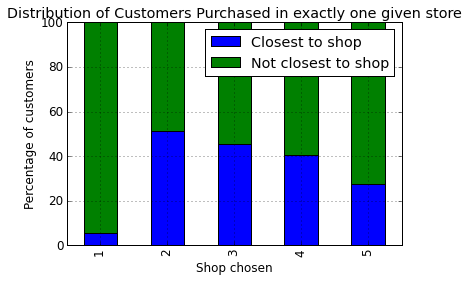

In [157]:
# PERCENTAGE OF ALL PEOPLE WHO PURCHASE AT ONLY ONE GIVEN SHOP AND ARE CLOSEST TO SUCH STORE

listA = []
listB = []
df_stack = pd.DataFrame()

text_ = 'amount_purchased_shop_'

for k in range(1,6):
    
    a =  sum((data[text_ + str(k)] != 0.) &
          (data.shops_used == k))
    
    b = sum((data.closest_shop == k) & (data[text_ + str(k)] != 0.) &
          (data.shops_used == k))

    listA.append((1. - float(b)/float(a))*100.)
    listB.append(float(b)/float(a)*100.)

    #print "====="*8

df_stack['Closest to shop'] = listB
df_stack['Not closest to shop'] = listA
df_stack.index = range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of Customers Purchased in exactly one given store',stacked=True,
              grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Percentage of customers')
plt.show()

    


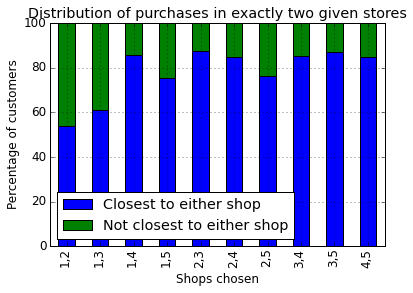

In [178]:
# PAIRS OF STORES
text_ = "amount_purchased_shop_"

listA = []
listB = []
df_stack = pd.DataFrame()
labels_ = []


for m in range(1,6):
    for n in range(m+1,6):
        
        #print "stores" , m,n
        
        labels_.append(str(m) + "," + str(n))
        
        a =  sum((data[text_ + str(m)] != 0.) & (data[text_ + str(n)] != 0.) &
          (data.shops_used == 2))


        b = sum((data[text_ + str(m)] != 0.) & (data[text_ + str(n)] != 0.) &
          (data.shops_used == 2) &
          ((data.closest_shop == m) | (data.closest_shop == n)))

        listA.append((1. - float(b)/float(a))*100.)
        listB.append(float(b)/float(a)*100.)
        
        #print b, a, 100.*float(b)/float(a)

        #print "====="*8
        
df_stack['Closest to either shop'] = listB
df_stack['Not closest to either shop'] = listA
df_stack.index = labels_ #range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of purchases in exactly two given stores',stacked=True,
              grid=True)
plt.xlabel('Shops chosen')
plt.ylabel('Percentage of customers')
plt.show()

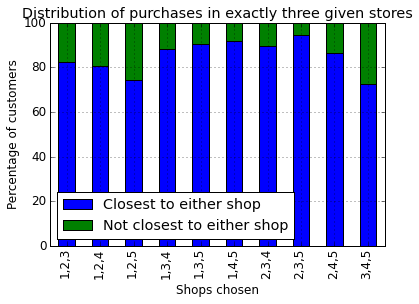

In [179]:
# GROUP OF THREE STORES
text_ = "amount_purchased_shop_"

listA = []
listB = []
df_stack = pd.DataFrame()
labels_ = []


for i in range(1,6):
    for j in range(i+1,6):
        for k in range(j+1,6):
            #print "stores" , i,j,k
            
            labels_.append(str(i) + "," + str(j) + "," + str(k))
        
            a =  sum((data[text_ + str(i)] != 0.) & (data[text_ + str(j)] != 0.) &
                     (data[text_ + str(k)] != 0.) & (data.shops_used == 3))


            b = sum((data[text_ + str(i)] != 0.) & (data[text_ + str(j)] != 0.) &
                    (data[text_ + str(k)] != 0.) &
                    (data.shops_used == 3) &
                    ((data.closest_shop == i) | (data.closest_shop == j) |
                     (data.closest_shop == k) ))

            listA.append((1. - float(b)/float(a))*100.)
            listB.append(float(b)/float(a)*100.)
        
        #print b, a, 100.*float(b)/float(a)

        #print "====="*8
        
df_stack['Closest to either shop'] = listB
df_stack['Not closest to either shop'] = listA
df_stack.index = labels_ #range(1,6)

df_stack.plot(kind='bar',
           title='Distribution of purchases in exactly three given stores',stacked=True,
              grid=True)
plt.xlabel('Shops chosen')
plt.ylabel('Percentage of customers')
plt.show()
        